In [48]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [7]:
df = pd.read_csv('Data/BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
df.shape

(324, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [11]:
df.columns = ['ds','y'] # 'ds,y' format required by Facebook's Prophet as these names are essentially hardcoded in
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [12]:
df.ds = pd.to_datetime(df.ds)
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [13]:
model = Prophet()
model.fit(df)

02:38:29 - cmdstanpy - INFO - Chain [1] start processing
02:38:31 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Create a future placeholder Pandas dataframe to store the predictions
future_df = model.make_future_dataframe(periods=24,freq='MS')
future_df.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [15]:
future_df.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [16]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [17]:
len(df), len(future_df)

(324, 348)

In [19]:
forecast = model.predict(future_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1763.763820,1134.823278,1459.622479,1763.763820,1763.763820,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,0.0,0.0,0.0,1302.445544
1,1992-02-01,1766.914160,1174.266945,1506.336892,1766.914160,1766.914160,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,0.0,0.0,0.0,1340.499281
2,1992-03-01,1769.861253,1431.836738,1756.496564,1769.861253,1769.861253,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,0.0,0.0,0.0,1591.380524
3,1992-04-01,1773.011594,1425.953116,1738.998170,1773.011594,1773.011594,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,0.0,0.0,0.0,1576.939880
4,1992-05-01,1776.060310,1661.182670,1975.088276,1776.060310,1776.060310,44.753299,44.753299,44.753299,44.753299,44.753299,44.753299,0.0,0.0,0.0,1820.813610


In [20]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [23]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(24)

,ds,yhat_lower,yhat_upper,yhat
324,2019-01-01,4278.104802,4617.954318,4444.089458
325,2019-02-01,4303.359696,4635.864134,4468.900039
326,2019-03-01,4544.592198,4862.434701,4708.043553
327,2019-04-01,4568.787373,4903.169923,4731.427650
328,2019-05-01,4844.103513,5170.479325,5003.149330
329,2019-06-01,4829.146810,5157.843752,4992.963748
330,2019-07-01,4969.188518,5301.228155,5139.161202
331,2019-08-01,4893.104498,5211.634447,5047.045726
332,2019-09-01,4746.750748,5061.759494,4906.813951
333,2019-10-01,4823.357819,5151.752271,4987.932339


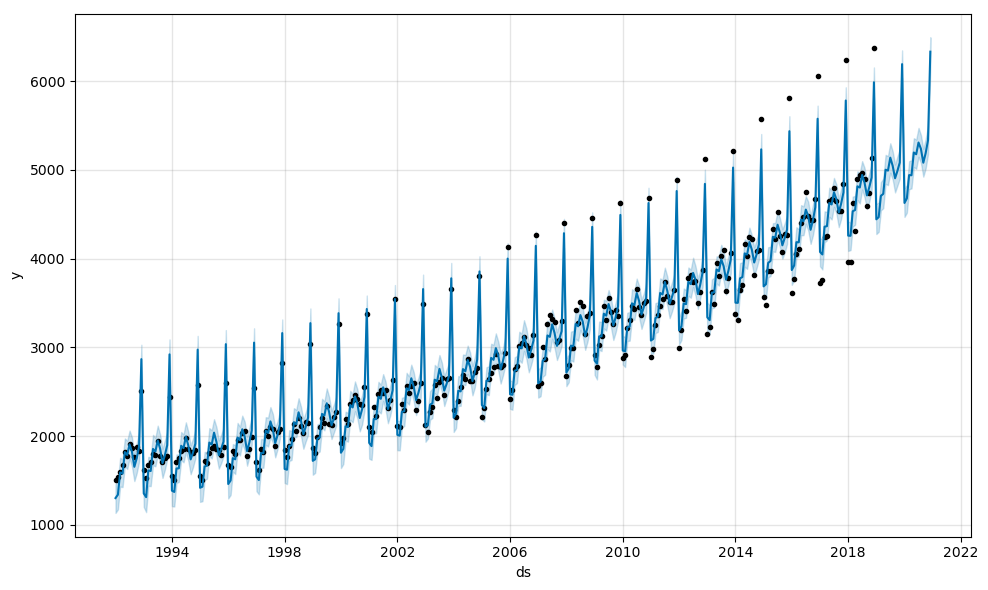

In [44]:
model.plot(forecast);

D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


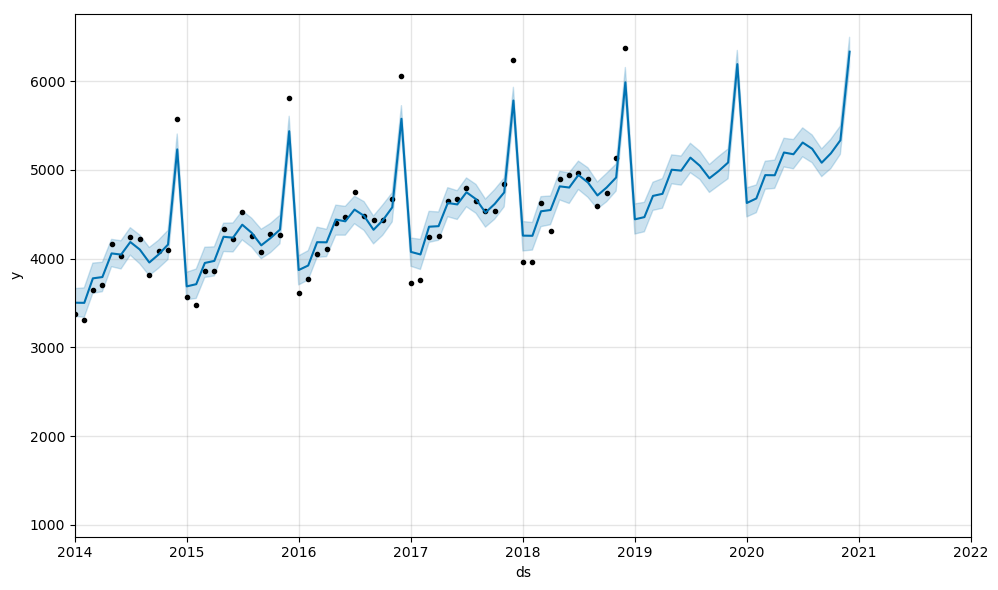

In [49]:
fig = model.plot(forecast)
ax = fig.gca()
ax.set_xlim([datetime(2014,1,1),datetime(2022,1,1)])
plt.show();

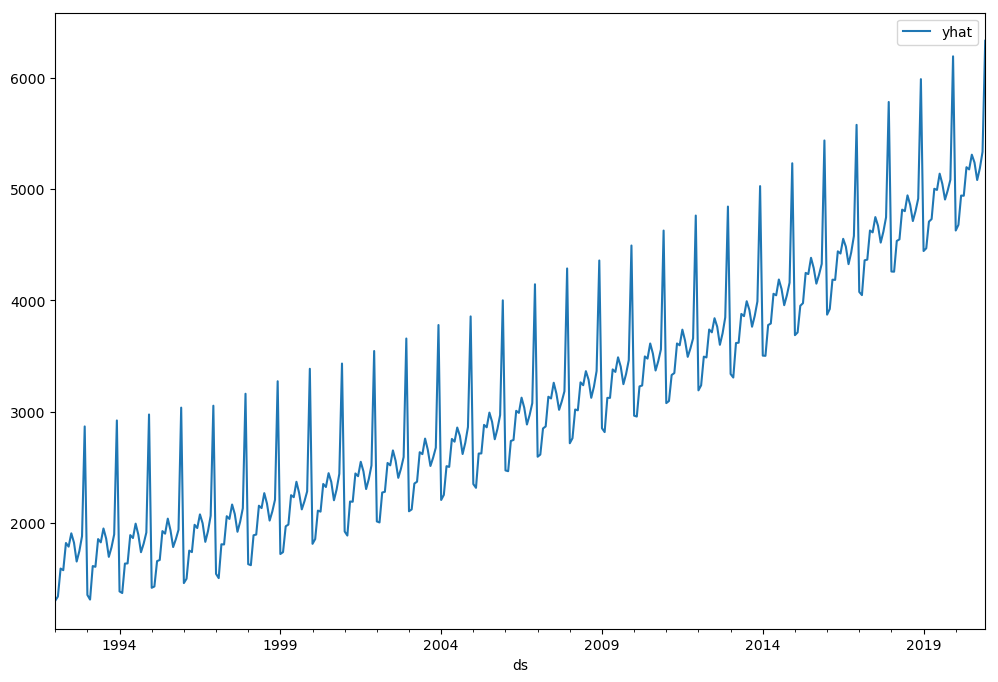

In [40]:
forecast.plot(x='ds',y='yhat',figsize=(12,8));

D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated a

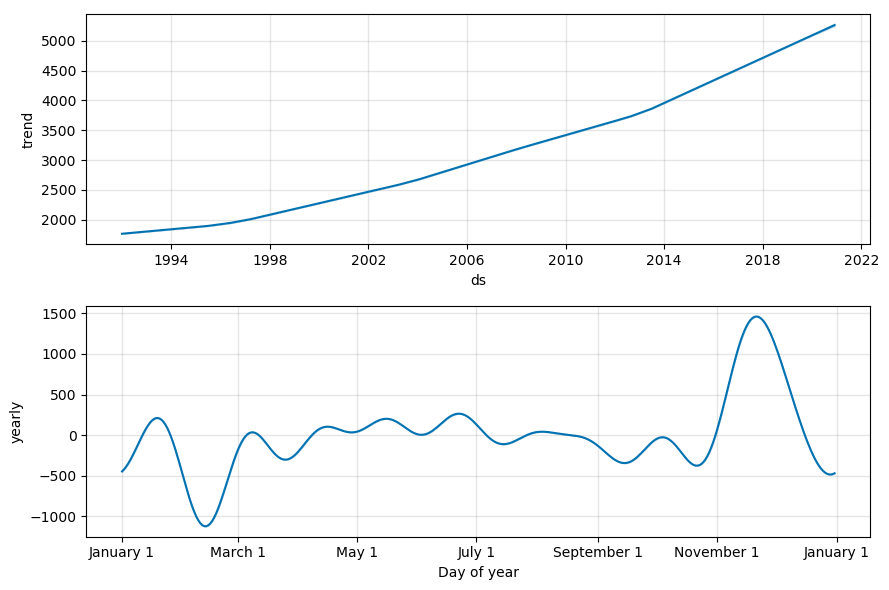

In [50]:
model.plot_components(forecast);